<a href="https://colab.research.google.com/github/kashifalikhan36/Used_car_prediction/blob/main/Used_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_sample=pd.read_csv("sample_submission.csv")

In [ ]:
data_sample.head()

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016


In [ ]:
data_train=pd.read_csv("train.csv")
data_train.drop(['model','brand', 'engine', 'transmission', 'ext_col', 'int_col','model_year'], axis=1, inplace=True)

data_train['fuel_type'].fillna('Unknown', inplace=True)
data_train['accident'].fillna('No Data', inplace=True)
data_train['clean_title'].fillna('Unknown', inplace=True)

data_train = data_train.drop_duplicates()
data_train.dropna(inplace=True)

text_columns = data_train.select_dtypes(include=['object']).columns

data_train = pd.get_dummies(data_train, drop_first=True, dtype=int)
data_train=data_train.drop(['fuel_type_Gasoline','milage','fuel_type_E85 Flex Fuel','fuel_type_not supported','fuel_type_–','clean_title_Yes'],axis=1)
data_train

,id,price,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_Unknown,accident_No Data,accident_None reported
0,0,4200,0,0,0,0,1
1,1,4999,0,0,0,0,0
2,2,13900,0,0,0,0,1
3,3,45000,0,0,0,0,1
4,4,97500,0,0,0,0,1
...,...,...,...,...,...,...,...
188528,188528,27500,0,0,0,0,1
188529,188529,30000,0,0,0,0,0
188530,188530,86900,0,0,0,0,1
188531,188531,84900,0,0,0,0,1


In [ ]:
data_test=pd.read_csv("test.csv")
data_test.drop(['model','brand', 'engine', 'transmission', 'ext_col', 'int_col','model_year'], axis=1, inplace=True)

data_test['fuel_type'].fillna('Unknown', inplace=True)
data_test['accident'].fillna('No Data', inplace=True)
data_test['clean_title'].fillna('Unknown', inplace=True)

data_test = data_test.drop_duplicates()
data_test.dropna(inplace=True)

text_columns = data_test.select_dtypes(include=['object']).columns

data_test = pd.get_dummies(data_test, drop_first=True, dtype=int)
data_test=data_test.drop(['fuel_type_Gasoline','milage','fuel_type_E85 Flex Fuel','fuel_type_not supported','fuel_type_–','clean_title_Yes'],axis=1)
data_test

,id,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_Unknown,accident_No Data,accident_None reported
0,188533,0,0,0,0,1
1,188534,1,0,0,0,1
2,188535,0,0,0,0,1
3,188536,0,0,0,0,1
4,188537,0,0,0,0,1
...,...,...,...,...,...,...
125685,314218,0,0,0,0,1
125686,314219,0,0,0,0,1
125687,314220,0,0,0,0,1
125688,314221,0,0,0,0,1


In [ ]:
y=data_train[['price']].values
x=data_train.drop('price',axis=1).values

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression(fit_intercept=True)
regressor.fit(x,y)

LinearRegression()

<Axes: >

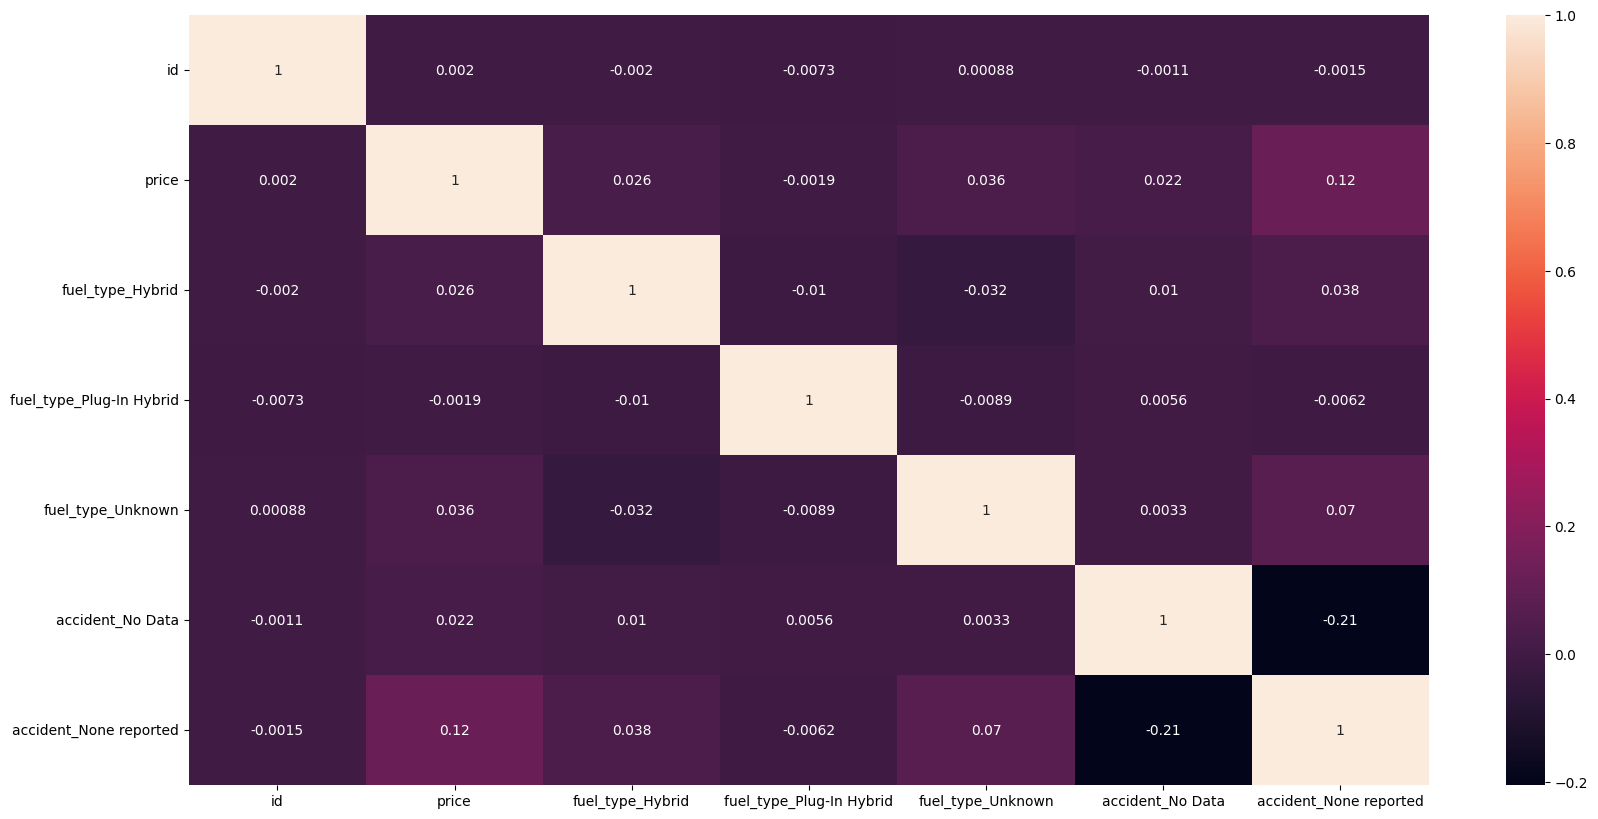

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data_test.corr(),annot=True)

In [ ]:
x=data_test.values

In [ ]:
x.keys()

Index(['id', 'fuel_type_Hybrid', 'fuel_type_Plug-In Hybrid',
       'fuel_type_Unknown', 'accident_No Data', 'accident_None reported'],
      dtype='object')

In [ ]:
y_pred=regressor.predict(x)

In [ ]:
combined_df = pd.concat([data_test[['id']], pd.DataFrame(y_pred, columns=['price'])], axis=1)

In [ ]:
combined_df.dropna(inplace=True)

In [ ]:
combined_df.isna().any()

,0
id,False
price,False


In [ ]:
# Drop NaN values from 'id' column in data_sample
cleaned_data_sample = data_sample.dropna()

# Merge cleaned_data_sample with combined_df on 'id'
merged_df = pd.merge(cleaned_data_sample, combined_df, on='id', how='left')


In [ ]:
merged_df

,id,price_x,price_y
0,188533,43878.016,48018.563479
1,188534,43878.016,58261.099748
2,188535,43878.016,48018.560557
3,188536,43878.016,48018.559095
4,188537,43878.016,48018.557634
...,...,...,...
125685,314218,43878.016,47834.902019
125686,314219,43878.016,47834.900558
125687,314220,43878.016,47834.899097
125688,314221,43878.016,47834.897635


In [ ]:
merged_df=merged_df.drop('price_y',axis=1)

KeyError: "['price_y'] not found in axis"

In [ ]:
merged_df.rename(columns={'price_x': 'price'}, inplace=True)


In [ ]:
merged_df

,id,price
0,188533,43878.016
1,188534,43878.016
2,188535,43878.016
3,188536,43878.016
4,188537,43878.016
...,...,...
125685,314218,43878.016
125686,314219,43878.016
125687,314220,43878.016
125688,314221,43878.016


In [ ]:
merged_df.to_csv('combined_data.csv', index=False)
from google.colab import files
files.download('combined_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>